# Euro Area Inflation Data (YoY)

This document provides an overview of the Year-over-Year (YoY) inflation data for the Euro Area, sourced from the Quandl API.

## Data Source

The data is retrieved using [Quandl](https://www.quandl.com/), specifically from the following URL:
[Inflation YoY Euro Area](https://data.nasdaq.com/data/RATEINF/INFLATION_EUR-inflation-yoy-euro-area)

## Dataset Information

- **Dataset ID:** RATEINF/INFLATION_EUR
- **Title:** Inflation YoY - Euro Area
- **Description:** This dataset represents the inflation rate in the Euro Area, calculated on a year-over-year basis.
- **Params:** Data is collapsed by month



In [20]:
import quandl
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [5]:
# get data using the quandl api 
inflation_data = quandl.get("RATEINF/INFLATION_EUR", authtoken="jQGEvAWnbhDtZsfYcfsH", collapse="monthly")

In [ ]:
# save as csv called RATEINF-INFLATION_EUR
# inflation_data.to_csv('RATEINF-INFLATION_EUR.csv')


In [6]:
inflation_data.head()

,Value
Date,
1991-01-31,3.90
1991-02-28,4.13
1991-03-31,3.88
1991-04-30,3.85
1991-05-31,4.10


In [8]:
#fix multi header in the df
inflation_data = inflation_data.reset_index()
inflation_data.head()


,Date,Value
0,1991-01-31,3.90
1,1991-02-28,4.13
2,1991-03-31,3.88
3,1991-04-30,3.85
4,1991-05-31,4.10


In [12]:
# Convert the 'Date' column to datetime format
inflation_data['Date'] = pd.to_datetime(inflation_data['Date'])
# Sort the dataframe by date in ascending order
inflation_data.sort_values('Date', inplace=True)
inflation_data.reset_index(drop=True, inplace=True)
# Check for missing values
missing_values = inflation_data.isnull().sum()
# Display tany missing values
missing_values


Date     0
Value    0
dtype: int64

In [13]:
#Descriptive stats
desc_stats = inflation_data['Value'].describe()
desc_stats

count    392.000000
mean       2.208163
std        1.693129
min       -0.650000
25%        1.297500
50%        2.030000
75%        2.610000
max       10.620000
Name: Value, dtype: float64

# Visualization Analysis

Visualize in blue

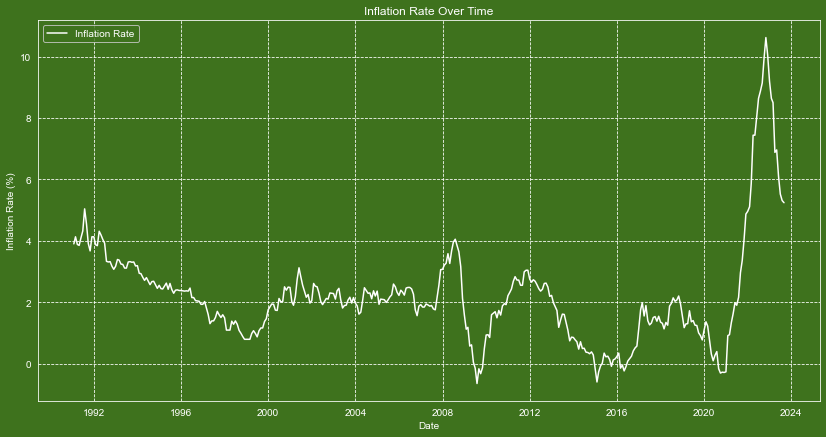

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


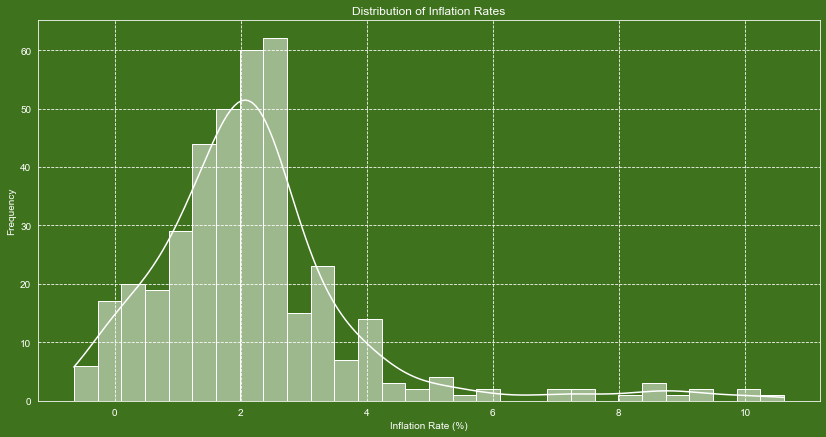

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


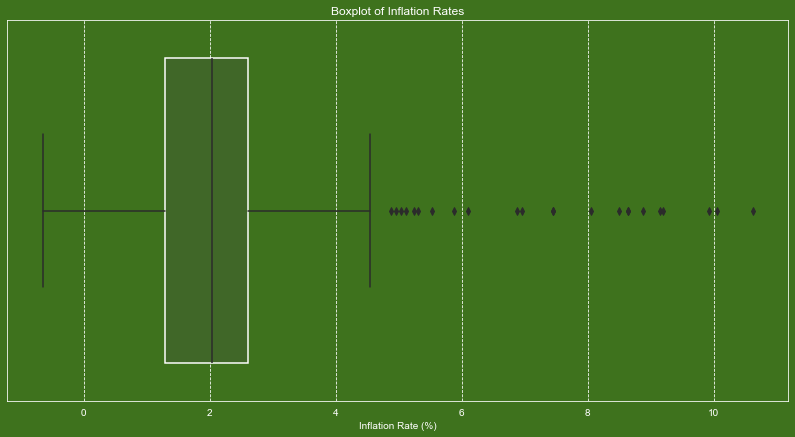

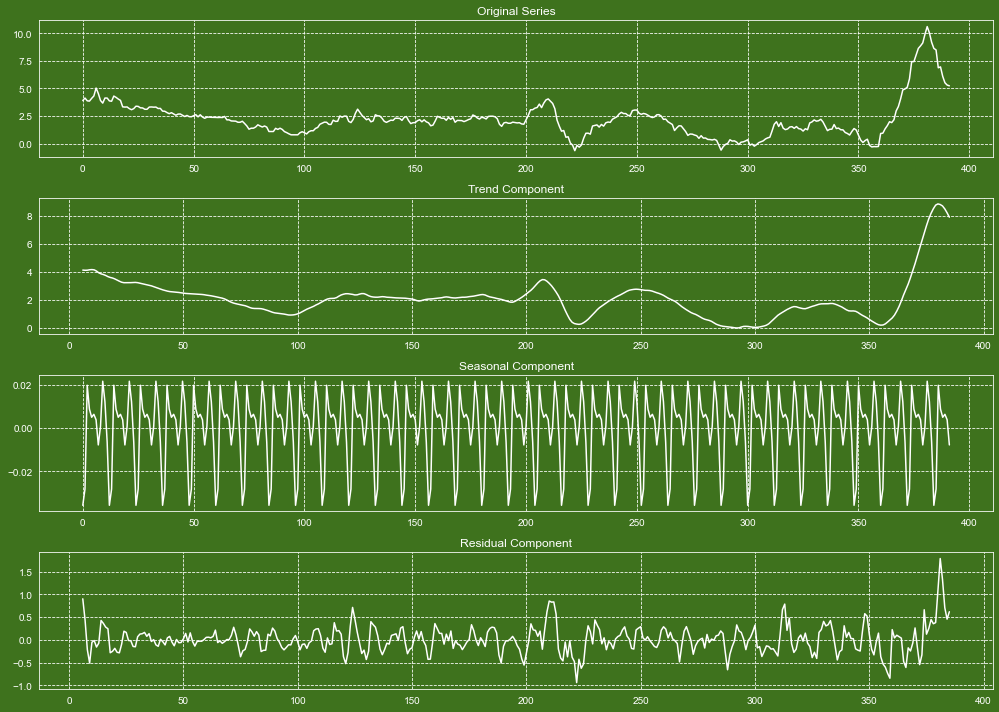

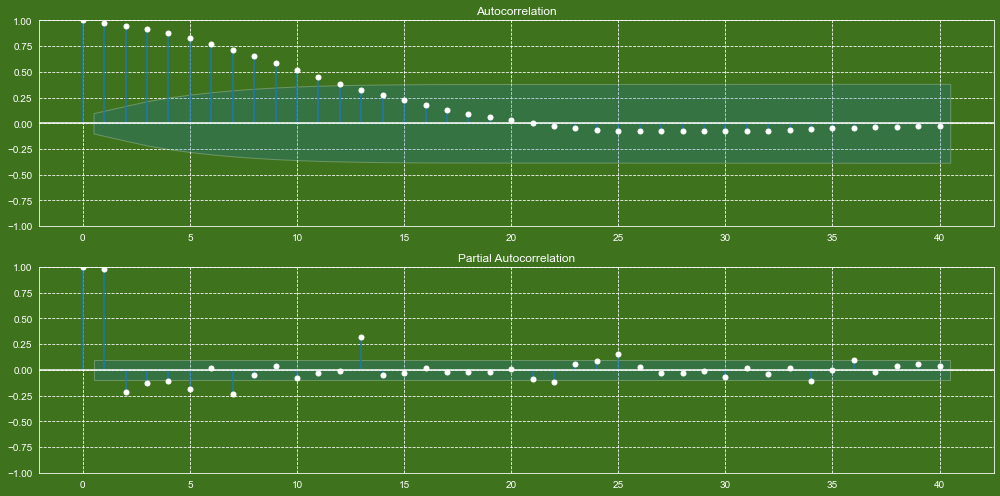

In [26]:
# Define the soccer field colors
grass_green = '#3E721D'  # Dark green to represent the grass
line_white = '#FFFFFF'  # White to represent the field lines

# Set the soccer field style
soccer_field_style = {
    'axes.facecolor': grass_green,
    'axes.edgecolor': line_white,
    'axes.labelcolor': line_white,
    'xtick.color': line_white,
    'ytick.color': line_white,
    'grid.color': line_white,
    'grid.linestyle': '--',
    'text.color': line_white,
    'figure.facecolor': grass_green,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
}

# Apply the soccer field style
sns.set_style("whitegrid", rc=soccer_field_style)

# Time Series Plot
plt.figure(figsize=(14, 7))
plt.plot(inflation_data['Date'], inflation_data['Value'], label='Inflation Rate', color=line_white)
plt.title('Inflation Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Inflation Rate (%)')
plt.legend()
plt.show()

# Histogram
plt.figure(figsize=(14, 7))
sns.histplot(inflation_data['Value'], kde=True, bins=30, color=line_white)
plt.title('Distribution of Inflation Rates')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(14, 7))
sns.boxplot(x=inflation_data['Value'], color=grass_green, boxprops=dict(edgecolor=line_white))
plt.title('Boxplot of Inflation Rates')
plt.xlabel('Inflation Rate (%)')
plt.show()

# Seasonal Decomposition
# Set the frequency to 12 as the data is monthly
freq = 12
decomposition = seasonal_decompose(inflation_data['Value'], model='additive', period=freq)

fig, ax = plt.subplots(4, 1, figsize=(14, 10))
ax[0].plot(decomposition.observed, color=line_white)
ax[0].set_title('Original Series')
ax[1].plot(decomposition.trend, color=line_white)
ax[1].set_title('Trend Component')
ax[2].plot(decomposition.seasonal, color=line_white)
ax[2].set_title('Seasonal Component')
ax[3].plot(decomposition.resid, color=line_white)
ax[3].set_title('Residual Component')
plt.tight_layout()
plt.show()

# Autocorrelation Analysis
fig, ax = plt.subplots(2, 1, figsize=(14, 7))
sm.graphics.tsa.plot_acf(inflation_data['Value'], lags=40, ax=ax[0], color=line_white)
sm.graphics.tsa.plot_pacf(inflation_data['Value'], lags=40, ax=ax[1], color=line_white)
plt.tight_layout()
plt.show()


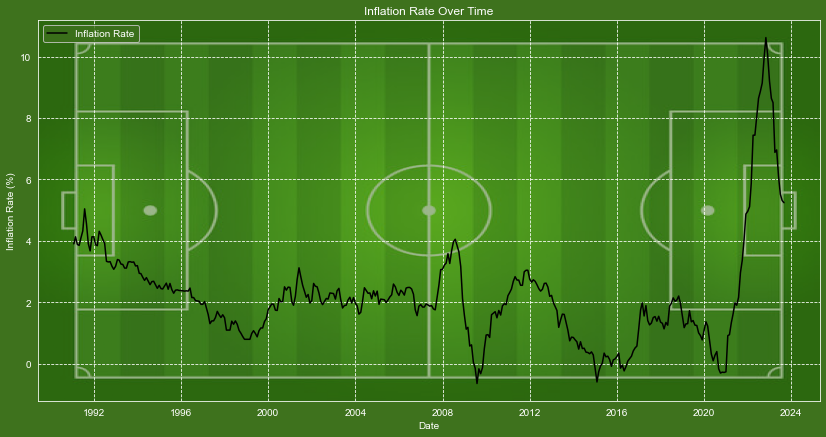

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


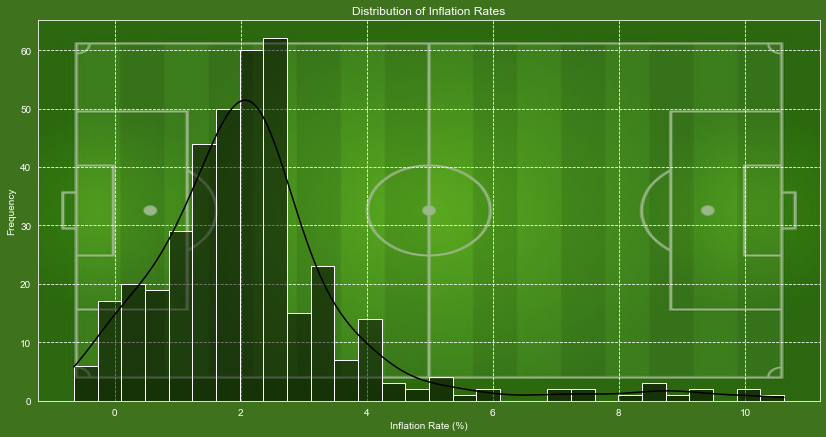

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


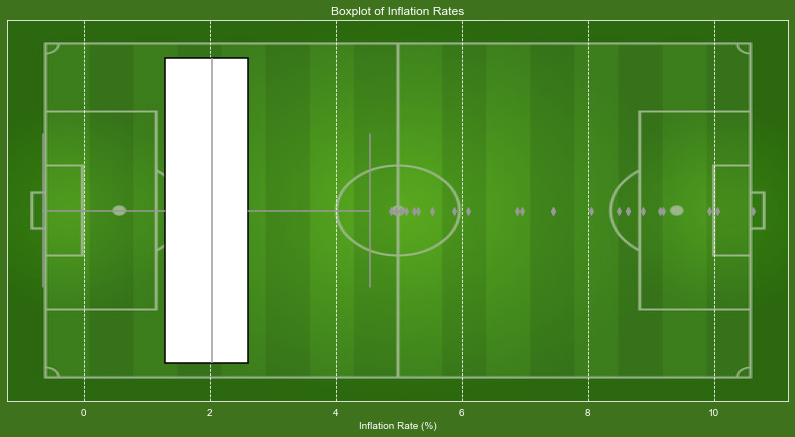

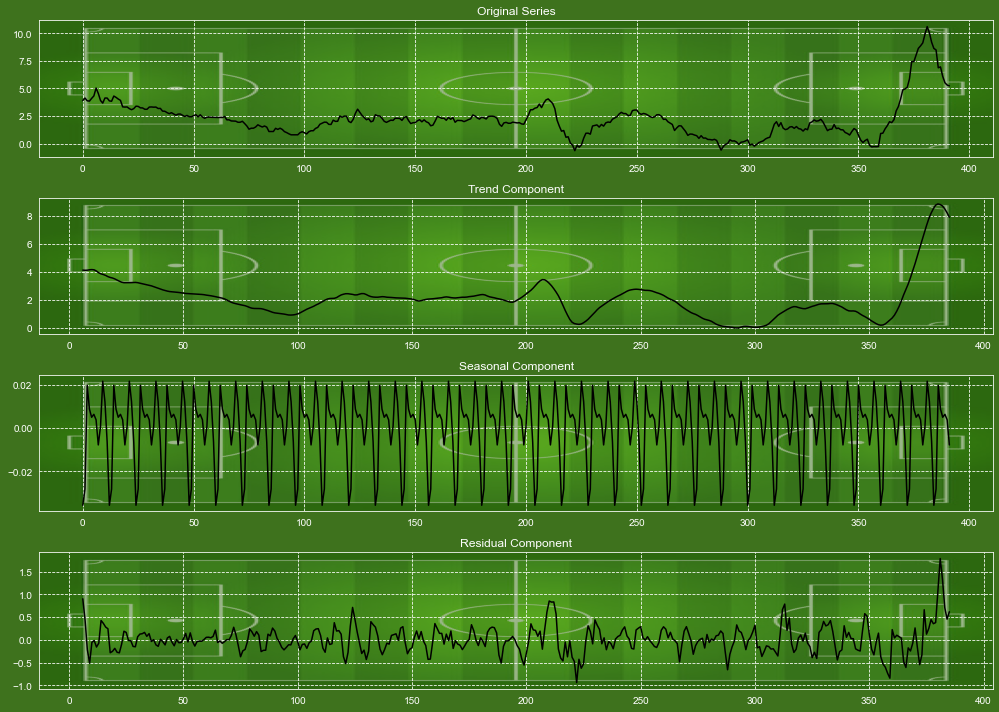

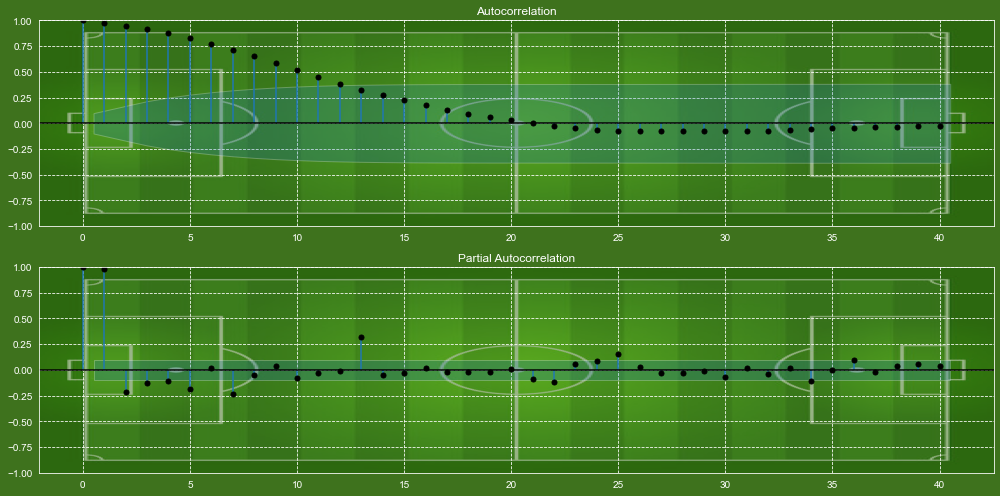

In [27]:
from matplotlib.image import imread

# Load the background image
bg_image_path = '../data/img/image.png'
bg_image = imread(bg_image_path)

# Function to add the background image to a plot
def add_background_image(ax):
    ax.imshow(bg_image, aspect='auto', extent=ax.get_xlim() + ax.get_ylim(), alpha=0.5)

# Replot the visualizations with the background image
# Time Series Plot
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(inflation_data['Date'], inflation_data['Value'], label='Inflation Rate', color='black')
ax.set_title('Inflation Rate Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Inflation Rate (%)')
add_background_image(ax)
plt.legend()
plt.show()

# Histogram
fig, ax = plt.subplots(figsize=(14, 7))
sns.histplot(inflation_data['Value'], kde=True, bins=30, color='black', ax=ax)
ax.set_title('Distribution of Inflation Rates')
ax.set_xlabel('Inflation Rate (%)')
ax.set_ylabel('Frequency')
add_background_image(ax)
plt.show()

# Boxplot
fig, ax = plt.subplots(figsize=(14, 7))
sns.boxplot(x=inflation_data['Value'], color='white', boxprops=dict(edgecolor='black'), ax=ax)
ax.set_title('Boxplot of Inflation Rates')
ax.set_xlabel('Inflation Rate (%)')
add_background_image(ax)
plt.show()

# Seasonal Decomposition
fig, ax = plt.subplots(4, 1, figsize=(14, 10))
ax[0].plot(decomposition.observed, color='black')
ax[0].set_title('Original Series')
add_background_image(ax[0])
ax[1].plot(decomposition.trend, color='black')
ax[1].set_title('Trend Component')
add_background_image(ax[1])
ax[2].plot(decomposition.seasonal, color='black')
ax[2].set_title('Seasonal Component')
add_background_image(ax[2])
ax[3].plot(decomposition.resid, color='black')
ax[3].set_title('Residual Component')
add_background_image(ax[3])
plt.tight_layout()
plt.show()

# Autocorrelation Analysis
fig, ax = plt.subplots(2, 1, figsize=(14, 7))
sm.graphics.tsa.plot_acf(inflation_data['Value'], lags=40, ax=ax[0], color='black')
add_background_image(ax[0])
sm.graphics.tsa.plot_pacf(inflation_data['Value'], lags=40, ax=ax[1], color='black')
add_background_image(ax[1])
plt.tight_layout()
plt.show()
